In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

%matplotlib inline

pd.set_option('display.max_columns', 500)

fig_dir = '../figs/'

Since downloading spreadsheets from the World Bank is a bit tedious, I'll be using a library that faciliates
interacting with the World Bank API: http://wbdata.readthedocs.io/en/latest/# 

In [2]:
import wbdata
import datetime

# Section 1: Exploratory Data Analysis

## Making a list of indicators of interest

### Dependent variable being explored:
+ mortality rate, under 5: SH.DYN.MORT

### Independent variables being explored:
+ Improved water source (% of population with access): SH.H20.SAFE.ZS
+ Prevalence of undernourishment (% of population): SN.ITK.DEFC.ZS
+ Improved sanitation facilities (% of population w/ access): SH.STA.ACSN
+ Health expenditure, total (% of GDP): SH.XPD.TOTL.ZS


+ External debt stocks: DT.DOD.DECT.GN.ZS
+ Short-term debt: DT.DOD.DSTC.IR.ZS


+ FDI, net inflows: BX.KLT.DINV.CD.WD


+ Access to electricity (% of population): EG.ELC.ACCS.ZS


+ Net investment in non-financial access: GC.NFN.TOTL.GD.ZS


+ Exports of goods & services (% of GDP): NE.EXP.GNFS.ZS

In [3]:
# Writing a function to simplify things
# indicators (one dependent variable and one independent variable) will be fed into the function
# for the indicators variable, the independent variable will always go first

def correlation(indicators):
    # getting data for 2015, which seems to be the most recent year with a lot of data
    data_date = (datetime.datetime(2011, 1, 1), datetime.datetime(2016, 1, 1))

    # using the wbdata library to create a df
    df = wbdata.get_dataframe(indicators, data_date = data_date, convert_date = False)
    df = df.dropna()
    df = df.reset_index()
    
    # including the correlation coefficient before creating the chart
    print("Correlation between variables: " + str(df.iloc[:,2].corr(df.iloc[:,3])))
    print("Shape of df: " + str(df.shape))
    
    # creating a chart of the correlation
    sns.lmplot(x = str(list(indicators.values())[0]), y = str(list(indicators.values())[1]), data=df, aspect=2.5, size=6)

### Improved water access and mortality

In [4]:
indicators = {"SH.H2O.SAFE.ZS": "improved_water_access", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.8111055087103322
Shape of df: (1152, 4)


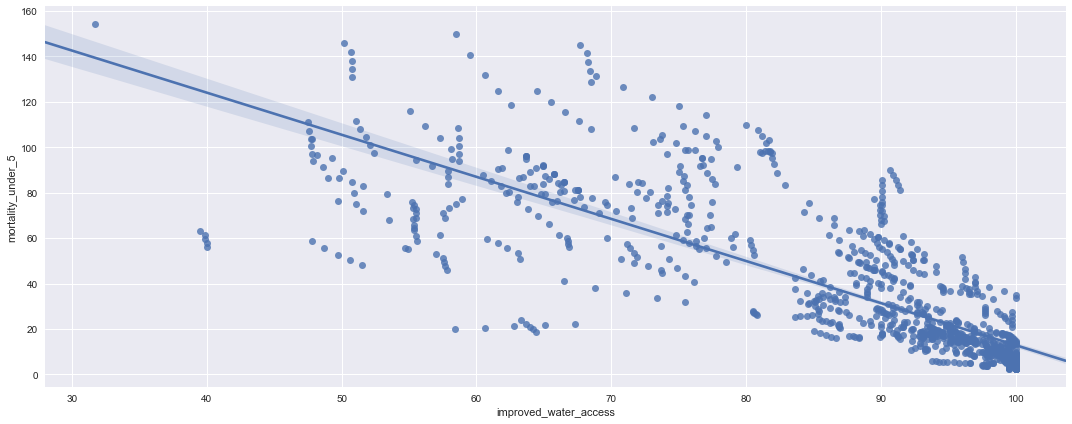

In [5]:
correlation(indicators)

This is an impressive correlation!

### Mortality under 5 and undernourishment

In [6]:
indicators = {"SN.ITK.DEFC.ZS": "undernourishment_prevalence", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: 0.6408429690740679
Shape of df: (1063, 4)


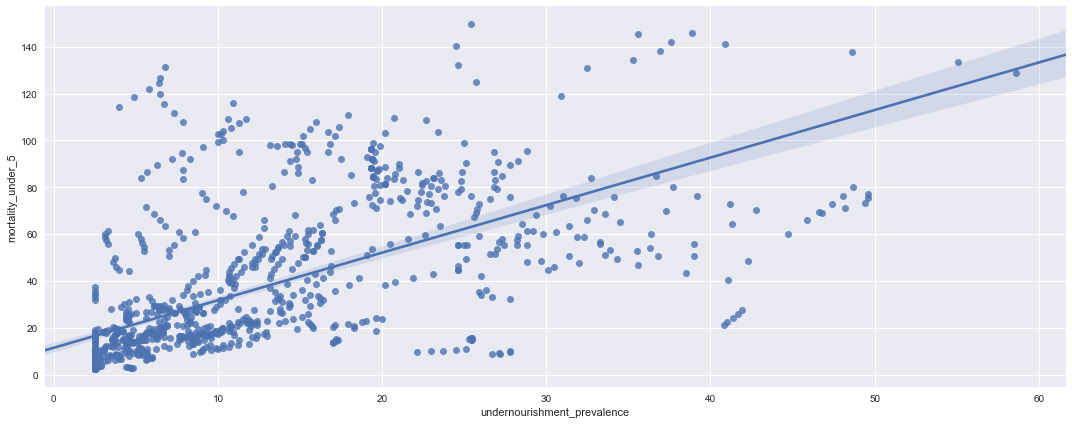

In [7]:
correlation(indicators)

### Improved sanitation and mortality under 5

In [8]:
indicators = {"SH.STA.ACSN": "improved_sanitation", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.8756803027768711
Shape of df: (1146, 4)


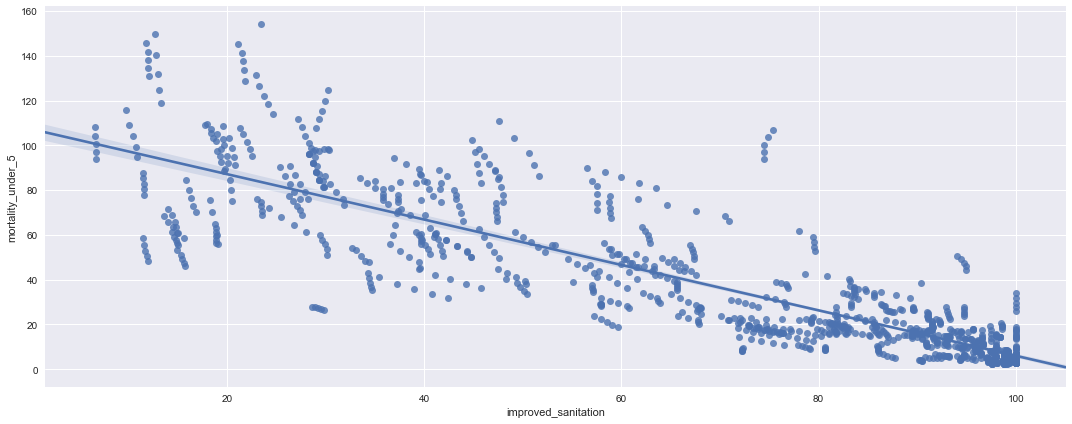

In [9]:
correlation(indicators)

Wow, improved sanitation has an impressive correlation with a decline in the mortality rate. Going to dig deeper on this indicator in section 2

### Health expenditure and mortality under 5
+ SH.XPD.TOTL.ZS

In [37]:
indicators = {"SH.XPD.TOTL.ZS": "health_exp", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.295186450400342
Shape of df: (943, 4)


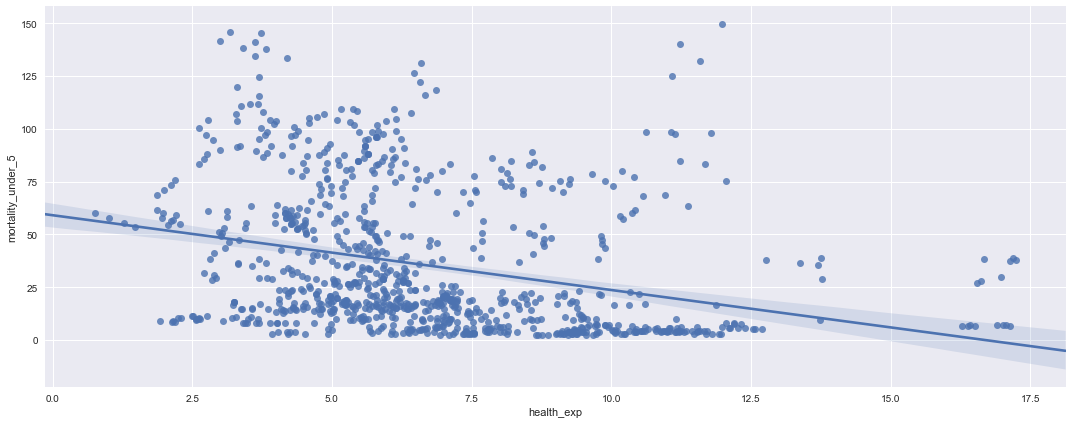

In [40]:
correlation(indicators)

### External debt stocks and mortality under 5
+ DT.DOD.DECT.GN.ZS

In [41]:
indicators = {"DT.DOD.DECT.GN.ZS": "external_debt", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.35269342611822035
Shape of df: (775, 4)


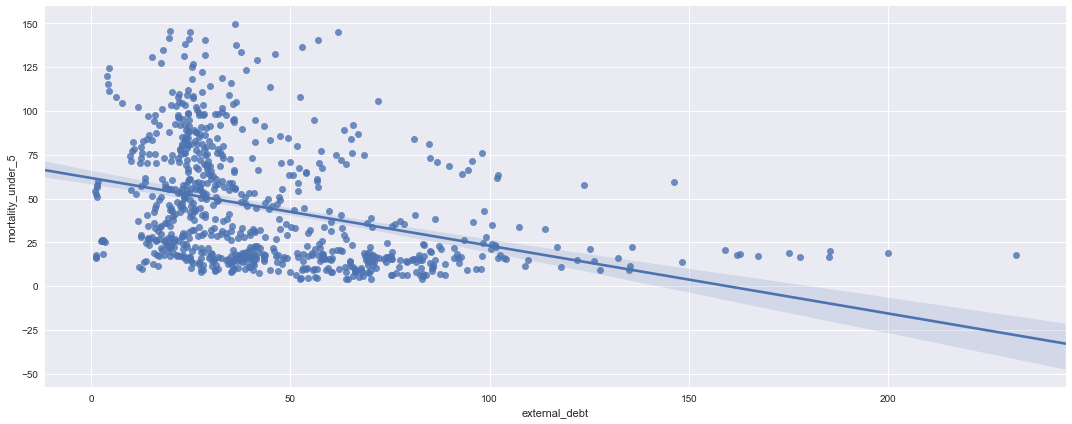

In [42]:
correlation(indicators)

### Short term debt and mortality under 5
+ DT.DOD.DSTC.IR.ZS

In [43]:
indicators = {"DT.DOD.DSTC.IR.ZS": "short_term_debt", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: 0.006004067056639306
Shape of df: (806, 4)


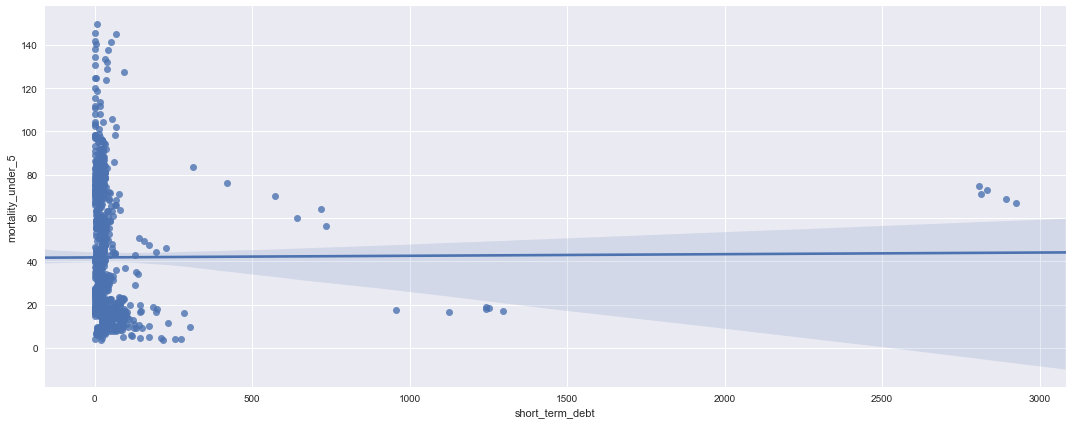

In [44]:
correlation(indicators)

### FDI and mortality under 5
+ BX.KLT.DINV.CD.WD

In [45]:
indicators = {"BX.KLT.DINV.CD.WD": "FDI", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.12017448822370502
Shape of df: (1400, 4)


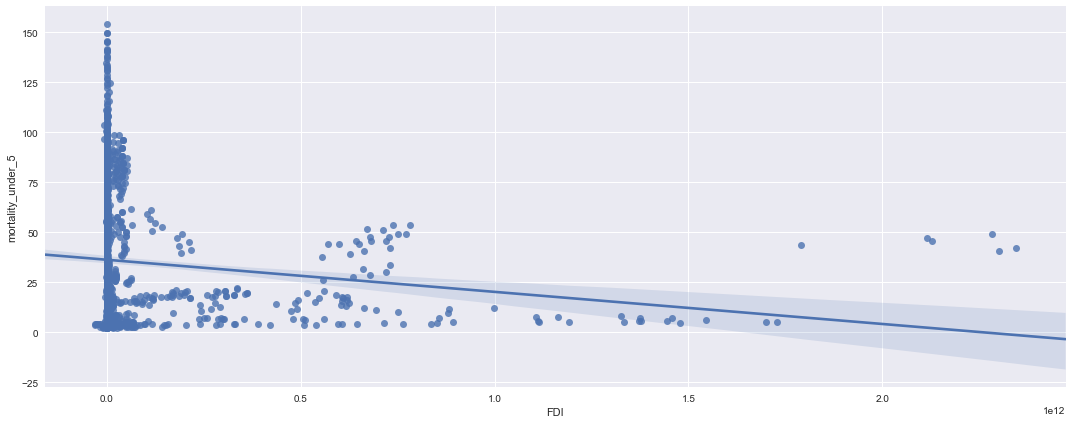

In [46]:
correlation(indicators)

### Access to electricity and mortality under 5
+ EG.ELC.ACCS.ZS

In [47]:
indicators = {"EG.ELC.ACCS.ZS": "access_to_electricity", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.8492377271440031
Shape of df: (956, 4)


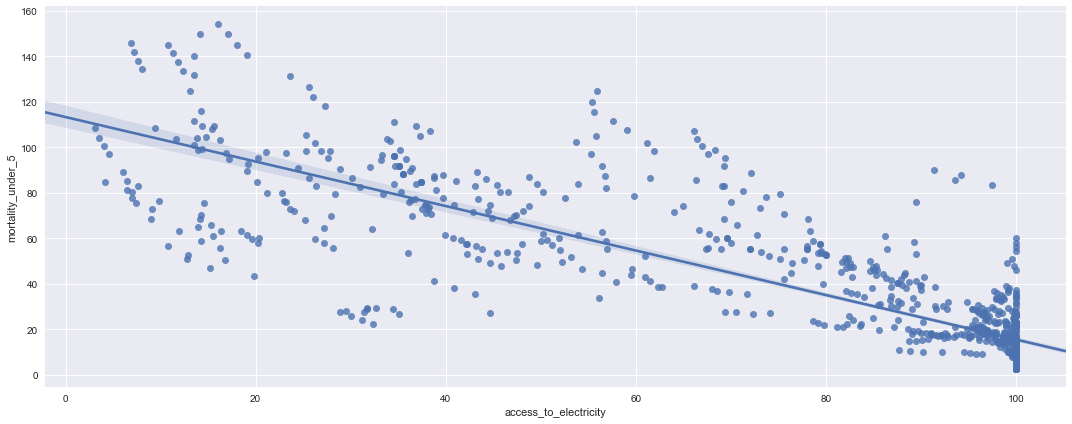

In [48]:
correlation(indicators)

In [55]:
# pulling data from 2011 to end of 2015
data_date = (datetime.datetime(2011, 1, 1), datetime.datetime(2016, 1, 1))

# creating a dataframe for electricity
electricity = wbdata.get_dataframe(indicators, data_date = data_date, convert_date = False)
# dropping NaN values
electricity = electricity.dropna()
# resetting index to simplify working with columns later on
electricity = electricity.reset_index()

In [56]:
electricity.head()

,country,date,access_to_electricity,mortality_under_5
0,Arab World,2014,88.039125,39.586356
1,Arab World,2013,87.604961,40.473654
2,Arab World,2012,86.846966,41.507190
3,Arab World,2011,86.392313,42.588746
4,Caribbean small states,2014,96.827533,19.273443


This is a pretty strong correlation too. Will look more into this #!

### Net investment in nonfinancial assets and mortality under 5
+ GC.NFN.TOTL.GD.ZS

In [57]:
indicators = {"GC.NFN.TOTL.GD.ZS": "net_investment_nonfin", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: 0.3989141268199586
Shape of df: (770, 4)


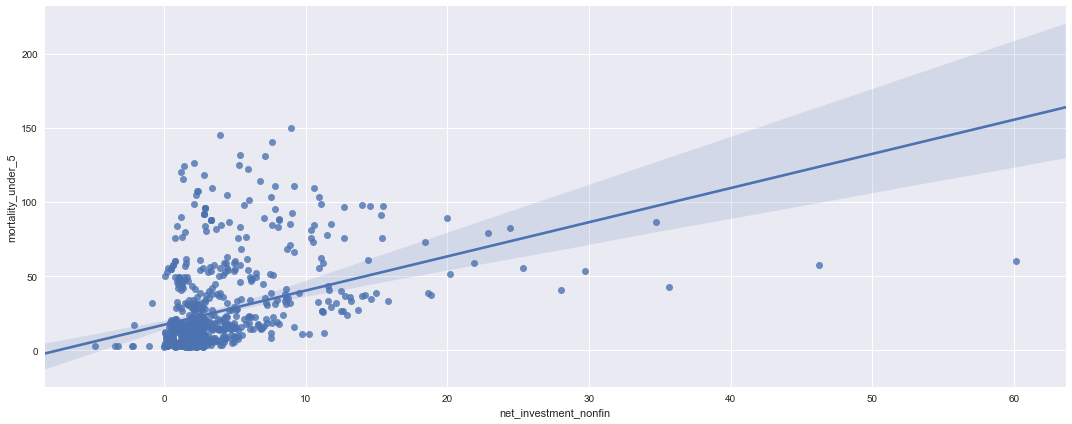

In [58]:
correlation(indicators)

### Exports (% of GDP) and mortality under 5
+ NE.EXP.GNFS.ZS

In [59]:
indicators = {"NE.EXP.GNFS.ZS": "exports", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.32586997859452815
Shape of df: (1331, 4)


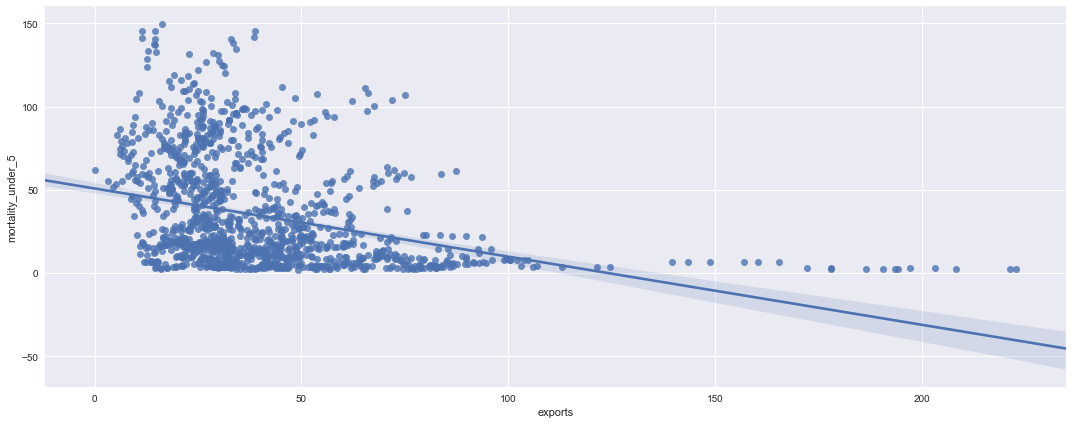

In [60]:
correlation(indicators)

### Immunization, DPT (% of children ages 12-23 months) and mortality under 5 

+  SH.IMM.IDPT

In [35]:
indicators = {"SH.IMM.IDPT": "immunization_DPT", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.6337513223744234
Shape of df: (1428, 4)


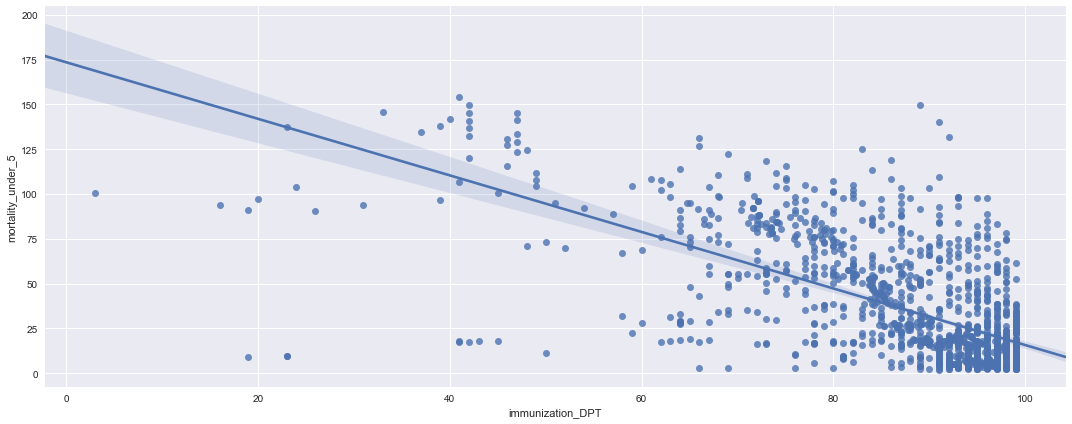

In [36]:
correlation(indicators)

### Open defecation (% of population) and mortality under 5
+ SH.STA.ODFC.ZS

In [37]:
indicators = {"SH.STA.ODFC.ZS": "open_defecation", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: 0.6904771945418108
Shape of df: (1192, 4)


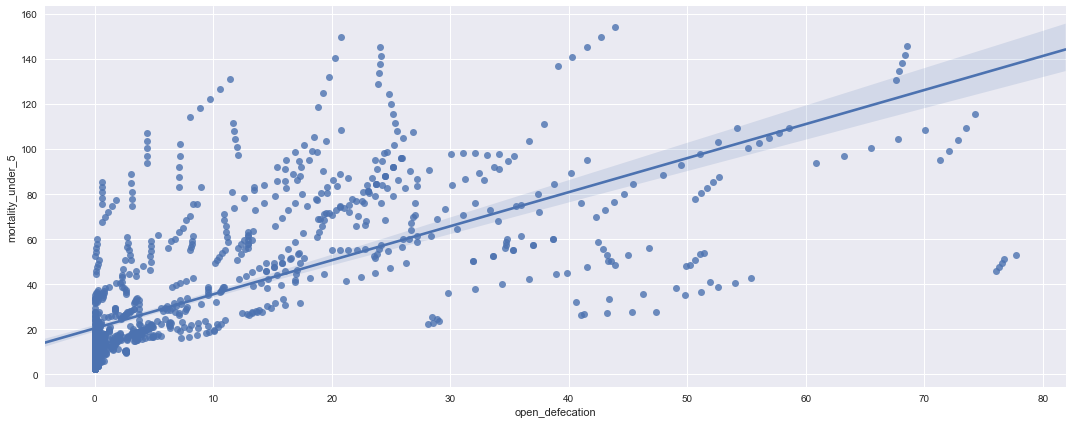

In [38]:
correlation(indicators)

### Incidence of malaria and mortality under 5
+ SH.MLR.INCD.P3

In [39]:
indicators = {"SH.MLR.INCD.P3": "malaria_incidence", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: 0.7479731431884618
Shape of df: (127, 4)


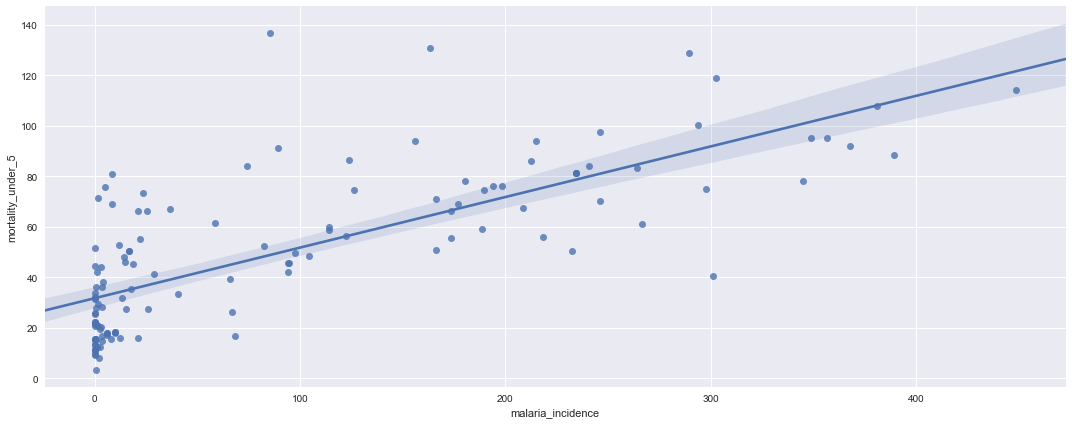

In [40]:
correlation(indicators)

### Immunization, measles (% of children 12-23 months) and mortality under 5
+ SH.IMM.MEAS

In [41]:
indicators = {"SH.IMM.MEAS": "immunization_measles", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.672151680921696
Shape of df: (1428, 4)


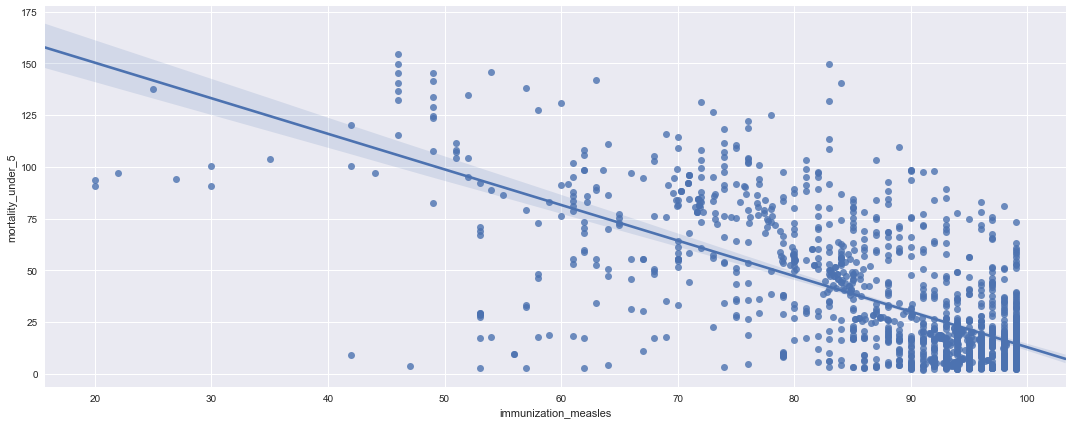

In [42]:
correlation(indicators)

# -------------------End of exploratory data analysis --------------------------------

# Section 2: Digging deeper on three of the indicators

## From the above exploration, here are the three biggest correlations:
+ indicators = {"SH.STA.ACSN": "improved_sanitation", "SH.DYN.MORT": "mortality_under_5"}
+ indicators = {"SH.H2O.SAFE.ZS": "improved_water_access", "SH.DYN.MORT": "mortality_under_5"}
+ indicators = {"EG.ELC.ACCS.ZS": "access_to_electricity", "SH.DYN.MORT": "mortality_under_5"}

Because the World Bank data includes regional aggregates, I'll take a look at where areas most fall short. This would ID areas where the most effort should be used.

It might also be worth looking at how regional aggregates have changed over time

### Back to improved sanitation facilities (% with access)

In [88]:
indicators = {"SH.STA.ACSN": "improved_sanitation", "SH.DYN.MORT": "mortality_under_5"}

Correlation between variables: -0.8756803027768711
Shape of df: (1146, 4)


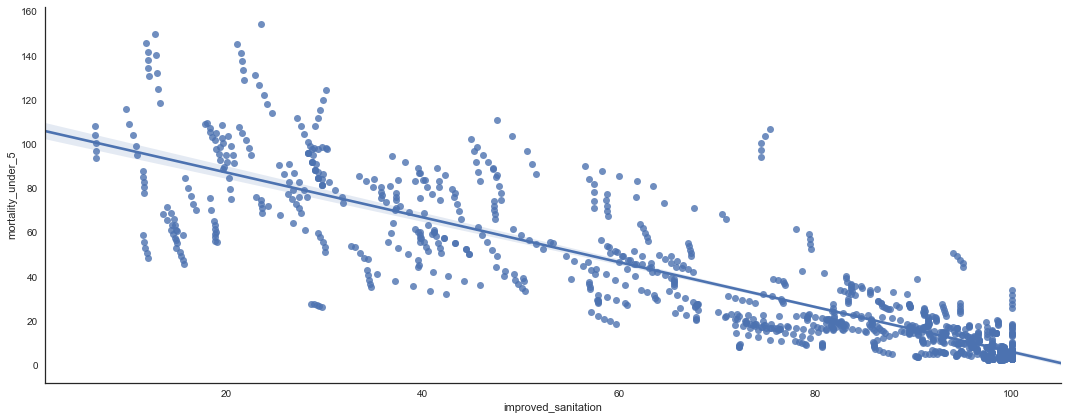

In [89]:
correlation(indicators)

In [46]:
# 
data_date = (datetime.datetime(2011, 1, 1), datetime.datetime(2016, 1, 1))

# creating a dataframe for sanitation
sanitation = wbdata.get_dataframe(indicators, data_date = data_date, convert_date = False)
# dropping NaN values
sanitation = sanitation.dropna()
# resetting index to simplify working with columns later on
sanitation = sanitation.reset_index()

In [47]:
sanitation.head()

,country,date,improved_sanitation,mortality_under_5
0,Arab World,2015,90.370494,38.743584
1,Arab World,2014,83.145325,39.586356
2,Arab World,2013,83.114690,40.473654
3,Arab World,2012,80.851929,41.507190
4,Arab World,2011,78.655542,42.588746


In [48]:
sanitation['country'].unique()#[0:50]

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

In [97]:
# I'll be using this variable repeatedly
wbRegions = ['Central Europe and the Baltics', 'East Asia & Pacific', 'Europe & Central Asia',
          'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia',
          'Sub-Saharan Africa']

In [100]:
region_sanitation = sanitation[sanitation.country.isin(wbRegions)]
region_sanitation

,country,date,improved_sanitation,mortality_under_5
10,Central Europe and the Baltics,2015,93.017108,5.788491
11,Central Europe and the Baltics,2014,92.968116,5.943451
12,Central Europe and the Baltics,2013,92.601321,6.191395
13,Central Europe and the Baltics,2012,92.219300,6.463696
14,Central Europe and the Baltics,2011,91.845158,6.771250
20,East Asia & Pacific,2015,77.213944,17.112930
21,East Asia & Pacific,2014,76.426011,17.886798
22,East Asia & Pacific,2013,75.497148,18.820174
23,East Asia & Pacific,2012,74.625187,19.797869
24,East Asia & Pacific,2011,73.657119,20.881183


In [101]:
region_sanitation.dtypes

country                 object
date                    object
improved_sanitation    float64
mortality_under_5      float64
dtype: object

In [102]:
region_sanitation_2015 = region_sanitation[region_sanitation['date'] == '2015']
region_sanitation_2015

,country,date,improved_sanitation,mortality_under_5
10,Central Europe and the Baltics,2015,93.017108,5.788491
20,East Asia & Pacific,2015,77.213944,17.112930
40,Europe & Central Asia,2015,93.083715,10.152718
105,Latin America & Caribbean,2015,83.150680,18.068169
140,Middle East & North Africa,2015,91.137928,24.620895
160,North America,2015,99.979902,6.467836
195,South Asia,2015,44.774481,50.300000
205,Sub-Saharan Africa,2015,29.793631,81.345043


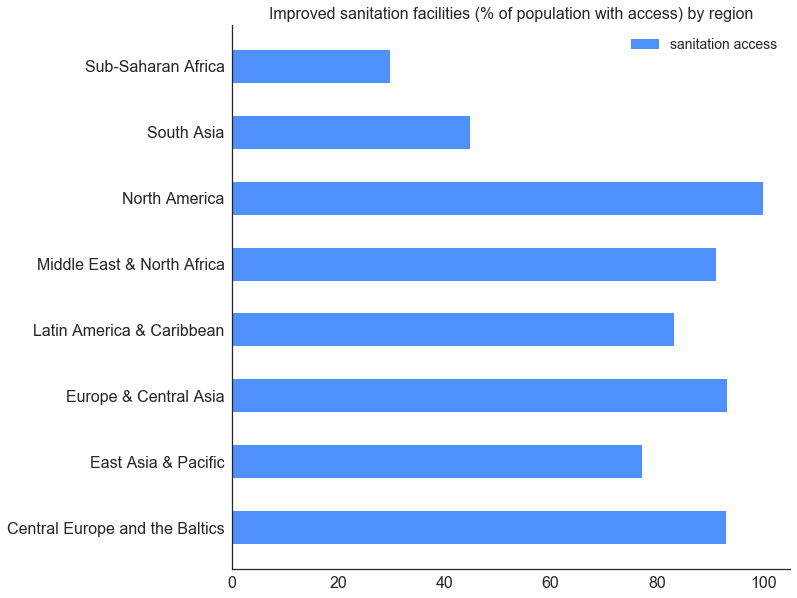

In [136]:
# create fig
fig, ax = plt.subplots(figsize=(10,10))

# setting bars
region = region_sanitation_2015.country
y_pos = np.arange(len(region_sanitation_2015.country))
width = .5
y1 = region_sanitation_2015['improved_sanitation']

# building the horizontal bar chart
ax.barh(y_pos, y1, width, label='sanitation access', color = '#4e91fc')

# setting the y labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(region)
ax.tick_params(labelsize=16)

# title
ax.set_title('Improved sanitation facilities (% of population with access) by region', fontsize=16)

# positioning the legend in the bottom right
ax.legend(loc=0, fontsize=14)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving fig
#plt.savefig(fig_dir+'spending_diff_btw_quintiles_food.png', dpi=300, bbox_inches='tight')

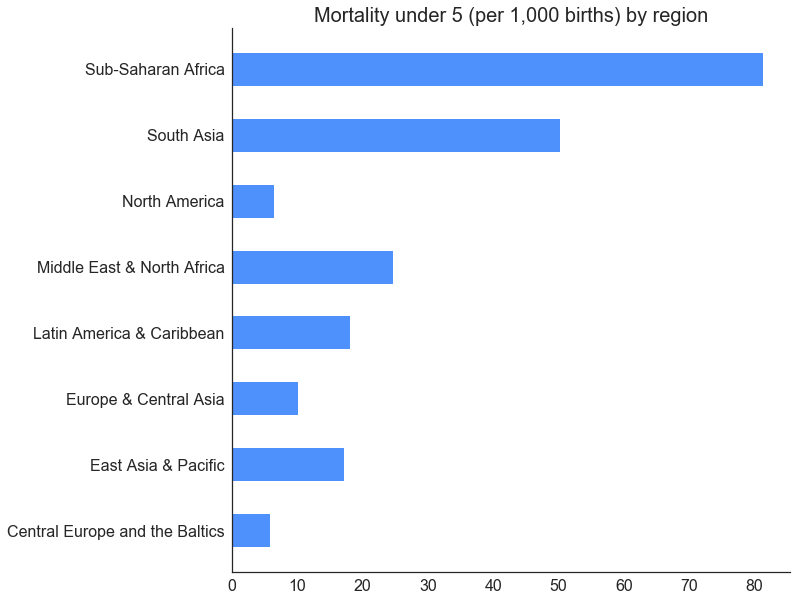

In [235]:
# create fig
fig, ax = plt.subplots(figsize=(10,10))

# setting bars
region = region_sanitation_2015.country
y_pos = np.arange(len(region_sanitation_2015.country))
width = .5
y1 = region_sanitation_2015['mortality_under_5']

# building the horizontal bars
ax.barh(y_pos, y1, width, color = '#4e91fc')

# setting the y labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(region)
ax.tick_params(labelsize=16)

# more labels and titles
#ax.set_xlabel('\nExpenditures (in USD)')
ax.set_title('Mortality under 5 (per 1,000 births) by region', fontsize = 20)

# positioning the legend in the bottom right
#ax.legend(loc=4, fontsize=14)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving fig
#!plt.savefig(fig_dir+'mortality_under_5_by_region.png', dpi=300, bbox_inches='tight')

Since the original correlation plot includes region aggregates and countries, I'm going to remove the former so that we only have countries, reducing the double count

In [57]:
sanitation[sanitation.country.isin(['Afghanistan'])]

,country,date,improved_sanitation,mortality_under_5
230,Afghanistan,2015,31.9,73.2
231,Afghanistan,2014,31.8,76.1
232,Afghanistan,2013,31.1,79.3
233,Afghanistan,2012,30.5,82.8
234,Afghanistan,2011,29.9,86.4


In [59]:
# looking for the place in the index where the data transitions from region aggregates to countries
sanitation.iloc[228:232,:]

,country,date,improved_sanitation,mortality_under_5
228,World,2012,65.931285,47.3
229,World,2011,65.298910,49.3
230,Afghanistan,2015,31.900000,73.2
231,Afghanistan,2014,31.800000,76.1


In [61]:
# This will create a dataframe that only has countries in it
sanitation_countries_only = sanitation.iloc[230:,:]

Now that I have coutries only, I'm going to do the correlation plot again

Sanitation and mortality under 5 (per 1,000 births) correlation: -0.8632755795995233
DF Shape: (916, 4)



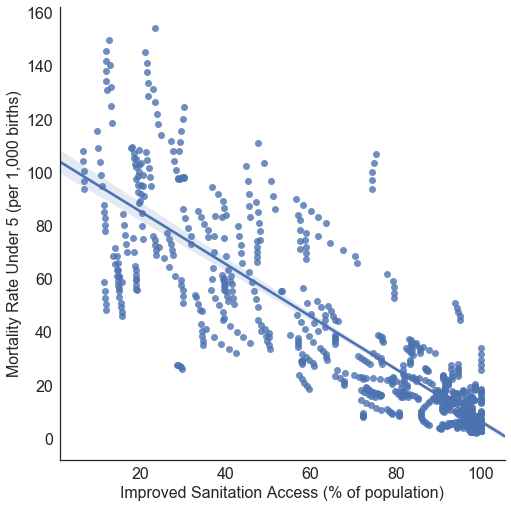

In [236]:
print("Sanitation and mortality under 5 (per 1,000 births) correlation: " + \
      str(sanitation_countries_only.mortality_under_5.corr(sanitation_countries_only.improved_sanitation)))
print("DF Shape: " + str(sanitation_countries_only.shape))
print()

# scatter plot with bivariate regression
sani_plot = sns.lmplot(x = 'improved_sanitation', y = 'mortality_under_5', data=sanitation_countries_only, size=7)

# labels and axes
#sns.set_style("white")
sani_plot.set_xlabels('Improved Sanitation Access (% of population)', fontsize = 16)
sani_plot.set_ylabels('Mortality Rate Under 5 (per 1,000 births)', fontsize = 16)
sani_plot.set_yticklabels(fontsize = 16)
sani_plot.set_xticklabels(fontsize = 16)

plt.savefig(fig_dir+'sanitation_mortality_under5_correlation.png', dpi=300, bbox_inches='tight')

Per the chart above, this is still a pretty strong correlation, even with the region aggregates removed. Definitely something here.

### Back to improved water source (% of population with access)

In [94]:
indicators = {"SH.H2O.SAFE.ZS": "improved_water_access", "SH.DYN.MORT": "mortality_under_5"}

In [96]:
# pulling data from 2011 to end of 2015
data_date = (datetime.datetime(2011, 1, 1), datetime.datetime(2016, 1, 1))

# creating a dataframe for water
water = wbdata.get_dataframe(indicators, data_date = data_date, convert_date = False)
# dropping NaN values
water = water.dropna()
# resetting index to simplify working with columns later on
water = water.reset_index()

In [99]:
water.head()

,country,date,improved_water_access,mortality_under_5
0,Arab World,2015,92.146826,38.743584
1,Arab World,2014,88.131709,39.586356
2,Arab World,2013,88.144052,40.473654
3,Arab World,2012,85.684161,41.507190
4,Arab World,2011,83.656911,42.588746


In [105]:
# region water access
region_water = water[water.country.isin(wbRegions)]
region_water

,country,date,improved_water_access,mortality_under_5
10,Central Europe and the Baltics,2015,99.192467,5.788491
11,Central Europe and the Baltics,2014,99.192510,5.943451
12,Central Europe and the Baltics,2013,99.145347,6.191395
13,Central Europe and the Baltics,2012,98.860182,6.463696
14,Central Europe and the Baltics,2011,98.575614,6.771250
20,East Asia & Pacific,2015,94.137101,17.112930
21,East Asia & Pacific,2014,93.561358,17.886798
22,East Asia & Pacific,2013,92.895483,18.820174
23,East Asia & Pacific,2012,92.366396,19.797869
24,East Asia & Pacific,2011,91.638135,20.881183


In [106]:
region_water_2015 = region_water[region_water['date'] == '2015']
region_water_2015

,country,date,improved_water_access,mortality_under_5
10,Central Europe and the Baltics,2015,99.192467,5.788491
20,East Asia & Pacific,2015,94.137101,17.112930
40,Europe & Central Asia,2015,98.490608,10.152718
105,Latin America & Caribbean,2015,94.628210,18.068169
140,Middle East & North Africa,2015,93.500219,24.620895
160,North America,2015,99.260293,6.467836
195,South Asia,2015,92.371603,50.300000
205,Sub-Saharan Africa,2015,67.544928,81.345043


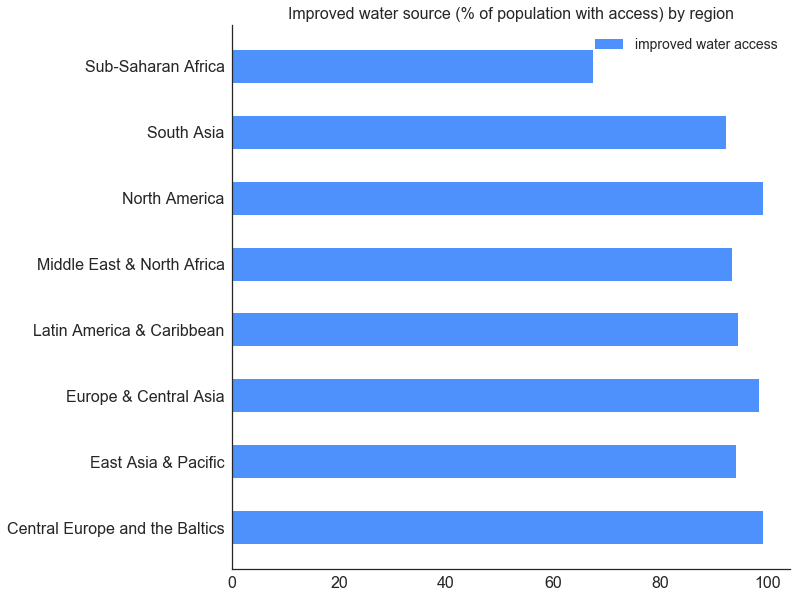

In [156]:
# creating a fig for improved water access by World Bank region
fig, ax = plt.subplots(figsize=(10,10))

# setting bars
region = region_water_2015.country
y_pos = np.arange(len(region_water_2015.country))
width = .5
y1 = region_water_2015['improved_water_access']

# building the chart
ax.barh(y_pos, y1, width, label='improved water access', color = '#4e91fc')

# setting the y labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(region)
ax.tick_params(labelsize=16)

# placing 2016 on top
# ax.invert_yaxis()

# more labels and titles
#ax.set_xlabel('\nExpenditures (in USD)')
ax.set_title('Improved water source (% of population with access) by region', fontsize=16)

# positioning the legend in the bottom right
ax.legend(loc=1, fontsize = 14)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving fig
#plt.savefig(fig_dir+'spending_diff_btw_quintiles_food.png', dpi=300, bbox_inches='tight')

Now I'm going to remove regions and have a lmplot with only countries

In [109]:
# Afghanistan is the first country in the country list
water[water.country.isin(['Afghanistan'])]

,country,date,improved_water_access,mortality_under_5
230,Afghanistan,2015,55.3,73.2
231,Afghanistan,2014,55.2,76.1
232,Afghanistan,2013,53.4,79.3
233,Afghanistan,2012,51.6,82.8
234,Afghanistan,2011,49.8,86.4


In [110]:
# This will create a dataframe that only has countries in it
water_countries_only = water.iloc[230:,:]

Improved water access and mortality under 5 (per 1,000 births) correlation: -0.792391497101293
DF Shape: (922, 4)



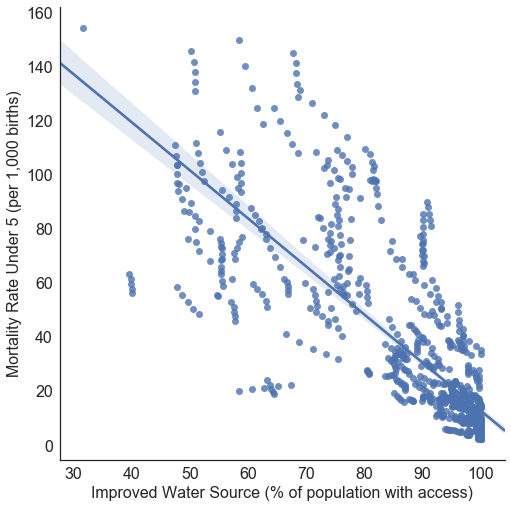

In [251]:
print("Improved water access and mortality under 5 (per 1,000 births) correlation: " + \
      str(water_countries_only.mortality_under_5.corr(water_countries_only.improved_water_access)))
print("DF Shape: " + str(water_countries_only.shape))
print()

# scatter plot with bivariate regression
water_plot = sns.lmplot(x = 'improved_water_access', y = 'mortality_under_5', data=water_countries_only, size=7)

# labels and axes
#sns.set_style("white")
water_plot.set_xlabels('Improved Water Source (% of population with access)', fontsize = 16)
water_plot.set_ylabels('Mortality Rate Under 5 (per 1,000 births)', fontsize = 16)
water_plot.set_yticklabels(fontsize = 16)
water_plot.set_xticklabels(fontsize = 16)
#water_plot.axes[0,0].set_xlim(0,)

#!plt.savefig(fig_dir+'water_source_mortality_under5_correlation.png', dpi=300, bbox_inches='tight')

### Back to Access to electricity (% of population)

In [139]:
indicators = {"EG.ELC.ACCS.ZS": "access_to_electricity", "SH.DYN.MORT": "mortality_under_5"}

In [140]:
data_date = (datetime.datetime(2011, 1, 1), datetime.datetime(2016, 1, 1))

electricity = wbdata.get_dataframe(indicators, data_date = data_date, convert_date = False)
electricity = electricity.dropna()
electricity = electricity.reset_index()

# pulling data from 2011 to end of 2015
# creating a dataframe for electricity
# dropping NaN values
# resetting index to simplify working with columns later on

In [141]:
region_electricity = electricity[electricity.country.isin(wbRegions)]
region_electricity

,country,date,access_to_electricity,mortality_under_5
8,Central Europe and the Baltics,2014,100.000000,5.943451
9,Central Europe and the Baltics,2013,100.000000,6.191395
10,Central Europe and the Baltics,2012,100.000000,6.463696
11,Central Europe and the Baltics,2011,100.000000,6.771250
16,East Asia & Pacific,2014,96.559231,17.886798
17,East Asia & Pacific,2013,96.334223,18.820174
18,East Asia & Pacific,2012,96.189495,19.797869
19,East Asia & Pacific,2011,95.827758,20.881183
32,Europe & Central Asia,2014,99.998613,10.619655
33,Europe & Central Asia,2013,99.995329,11.114673


In [144]:
# It seems the World Bank data only goes as far back as 2014, so we'll adjust accordingly
region_electricity_2014 = region_electricity[region_electricity['date'] == '2014']
region_electricity_2014

,country,date,access_to_electricity,mortality_under_5
8,Central Europe and the Baltics,2014,100.000000,5.943451
16,East Asia & Pacific,2014,96.559231,17.886798
32,Europe & Central Asia,2014,99.998613,10.619655
84,Latin America & Caribbean,2014,97.024349,18.662333
112,Middle East & North Africa,2014,96.989985,25.207241
128,North America,2014,100.000000,6.658533
156,South Asia,2014,80.057057,52.600000
164,Sub-Saharan Africa,2014,37.442514,84.565337


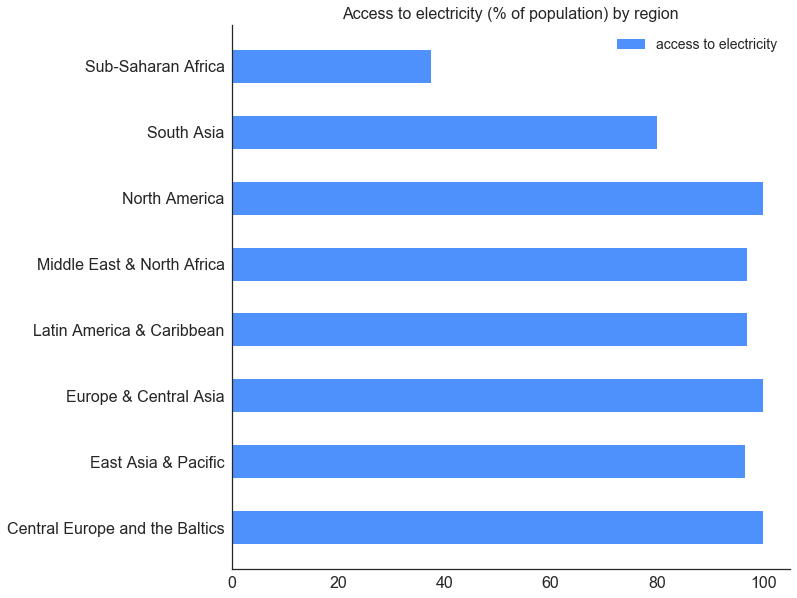

In [187]:
# creating a fig for improved water access by World Bank region
fig, ax = plt.subplots(figsize=(10,10))

# setting bars
region = region_electricity_2014.country
y_pos = np.arange(len(region_electricity_2014.country))
width = .5
y1 = region_electricity_2014['access_to_electricity']

# building the chart
ax.barh(y_pos, y1, width, label='access to electricity', color = '#4e91fc')
#4e91fc
#1a1ab2 - blue

# setting the y labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(region)
ax.tick_params(labelsize=16)

# placing 2016 on top
# ax.invert_yaxis()

# more labels and titles
#ax.set_xlabel('\nExpenditures (in USD)')
ax.set_title('Access to electricity (% of population) by region', fontsize=16)

# positioning the legend in the bottom right
ax.legend(loc=1, fontsize = 14)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving fig
#plt.savefig(fig_dir+'spending_diff_btw_quintiles_food.png', dpi=300, bbox_inches='tight')

In [146]:
# Afghanistan is the first country in the country list
electricity[electricity.country.isin(['Afghanistan'])]

,country,date,access_to_electricity,mortality_under_5
184,Afghanistan,2014,89.500000,76.1
185,Afghanistan,2013,75.154373,79.3
186,Afghanistan,2012,69.100000,82.8
187,Afghanistan,2011,61.514420,86.4


In [147]:
# This will create a dataframe that only has countries in it
electricity_countries_only = electricity.iloc[184:,:]

Access to electricity and mortality under 5 (per 1,000 births) correlation: -0.8398001360813088
DF Shape: (772, 4)



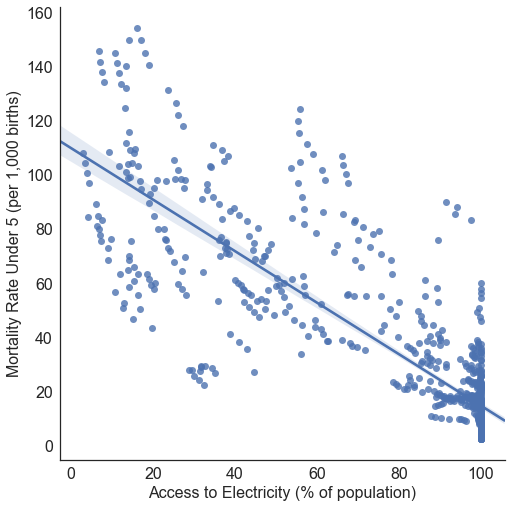

In [240]:
print("Access to electricity and mortality under 5 (per 1,000 births) correlation: " + \
      str(electricity_countries_only.mortality_under_5.corr(electricity_countries_only.access_to_electricity)))
print("DF Shape: " + str(electricity_countries_only.shape))
print()

# scatter plot with bivariate regression
electricity_plot = sns.lmplot(x = 'access_to_electricity', y = 'mortality_under_5', data=electricity_countries_only, size=7)

# labels and axes
#sns.set_style("white")
electricity_plot.set_xlabels('Access to Electricity (% of population)', fontsize = 16)
electricity_plot.set_ylabels('Mortality Rate Under 5 (per 1,000 births)', fontsize = 16)
electricity_plot.set_yticklabels(fontsize = 16)
electricity_plot.set_xticklabels(fontsize = 16)

plt.savefig(fig_dir+'access_to_electricity_mortality_under5_correlation.png', dpi=300, bbox_inches='tight')

### Chart with status of all three indicators by region

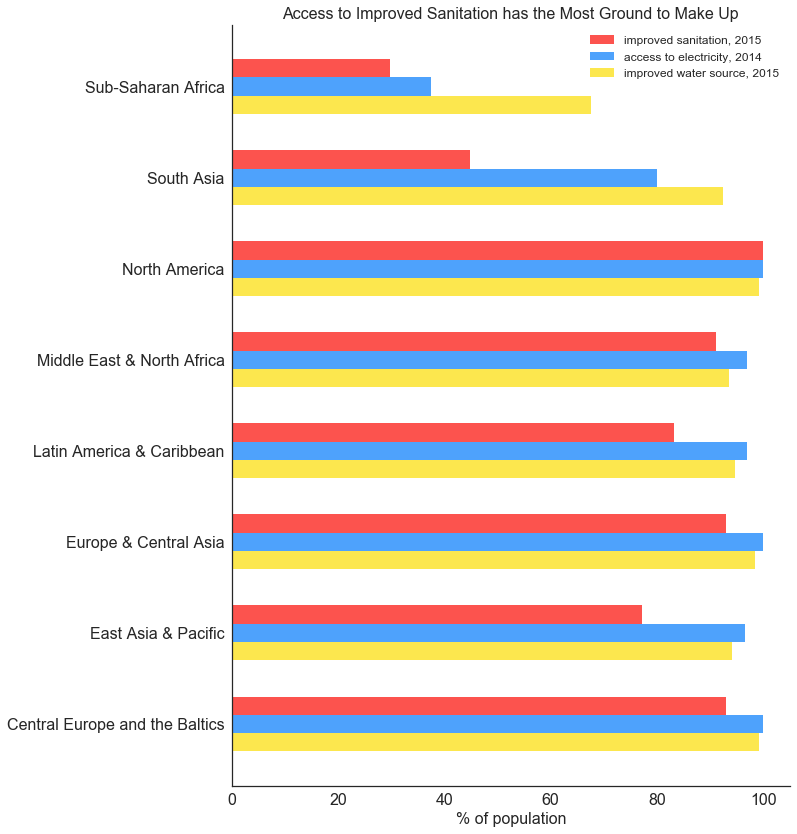

In [252]:
# creating a fig for improved water access by World Bank region
fig, ax = plt.subplots(figsize=(10,14))

# setting bars
region = region_electricity_2014.country
y_pos = np.arange(len(region_electricity_2014.country))
width = .20
y1 = region_sanitation_2015['improved_sanitation']
y2 = region_electricity_2014['access_to_electricity']
y3 = region_water_2015['improved_water_access']

# building the chart
ax.barh(y_pos +width + width, y1, width, label='improved sanitation, 2015', color = '#fc534e')
ax.barh(y_pos +width, y2, width, label='access to electricity, 2014', color='#4ea2fc')
ax.barh(y_pos, y3, width, label='improved water source, 2015', color='#fce74e')

# setting the y labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(region)
ax.tick_params(labelsize=16)
ax.set_xlabel('% of population', fontsize = 16)

# placing 2016 on top
# ax.invert_yaxis()

# more labels and titles
ax.set_title('Access to Improved Sanitation has the Most Ground to Make Up', fontsize=16)

# positioning the legend in the bottom right
ax.legend(loc=1, fontsize = 12)

# centering the y ticks between the blue and red bars
ax.set_yticks(y_pos + width)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving fig
plt.savefig(fig_dir+'indicators_by_region.png', dpi=300, bbox_inches='tight')

### Finally, a trend line of how much under 5 mortality (per 1,000 births has declined)

In [206]:
indicator = {"SH.DYN.MORT": "mortality_under_5"}

In [207]:
data_date = (datetime.datetime(1990, 1, 1), datetime.datetime(2016, 1, 1))

under5 = wbdata.get_dataframe(indicator, data_date = data_date, convert_date = False)
under5 = under5.dropna()
under5 = under5.reset_index()

In [211]:
world_under5 = under5[under5.country.isin(['World'])]

In [212]:
world_under5

,country,date,mortality_under_5
1215,World,2016,40.8
1216,World,2015,42.2
1217,World,2014,43.7
1218,World,2013,45.5
1219,World,2012,47.3
1220,World,2011,49.3
1221,World,2010,51.7
1222,World,2009,53.7
1223,World,2008,56.2
1224,World,2007,58.5


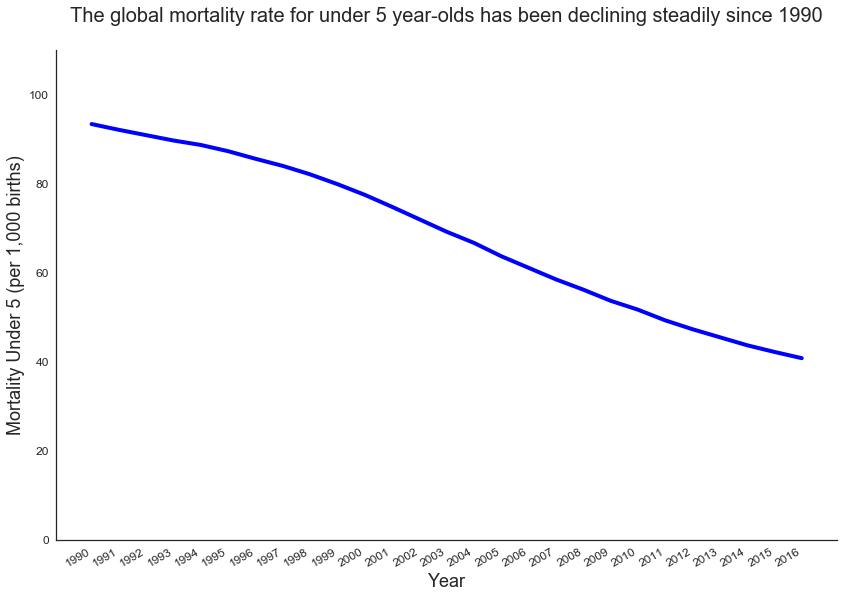

In [233]:
# creating the line chart
fig, ax = plt.subplots(figsize = (14,10))

# plotting the figure
ax.plot(world_under5.date, world_under5.mortality_under_5, 'b-', linewidth=4)

# setting and labeling the axes
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Mortality Under 5 (per 1,000 births)', fontsize=18)
ax.set_title('The global mortality rate for under 5 year-olds has been declining steadily since 1990\n', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylim(0, 110)

# tilting the date in the x axis
fig.autofmt_xdate()

# removing clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# save fig
plt.savefig(fig_dir+'world_under5.png', dpi=300, bbox_inches='tight')

In [230]:
under5[under5.country.isin(wbRegions)]
regions_under5 = under5[under5.country.isin(wbRegions)]

In [231]:
regions_under5[regions_under5.date=='2016']

,country,date,mortality_under_5
54,Central Europe and the Baltics,2016,5.606204
108,East Asia & Pacific,2016,16.351940
216,Europe & Central Asia,2016,9.696096
567,Latin America & Caribbean,2016,17.502400
756,Middle East & North Africa,2016,24.086862
864,North America,2016,6.359975
1053,South Asia,2016,48.100000
1107,Sub-Saharan Africa,2016,78.343975
